In [100]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as stats
from datetime import datetime,timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr
from scipy.stats import t, laplace, expon, uniform, norm
import statsmodels.api as sm
import random
import bs4 as bs
import requests
from itertools import chain
import yahoo_fin.stock_info as si
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from statsmodels.tsa.stattools import coint
from scipy.stats import t
from scipy.stats import norm

%matplotlib inline 


# The Following Code takes the Top Stocks with the Highest Reward to Risk Ratio.
### This ratio provides a decimal value of how much profit a stock will produce given the risk of the investment. 

In [133]:
def rrBasePortfolio(TAU):
    #These list of stocks represent the top 10 stocks in each of the sector ETFs. 
    healthCareTicks = ['UNH','JNJ', 'PFE', 'ABBV', 'LLY', 'MRK', 'TMO', 'ABT', 'DHR', 'BMY']
    utilitiesTicks = ['NEE','DUK','SO','D', 'AEP' , 'SRE', 'EXC', 'XEL', 'ED', 'WEC']
    consumerStaplesTicks = ['PG','KO','PEP','COST','WMT','MDLZ','PM','MO','CL','EL']
    materialsTicks = ['LIN','SHW','APD','NEM','FCX','CTVA','ECL','DOW','IFF','DD']
    financialsTicks = ['BRK-B','JPM','BAC', 'WFC', 'SPGI', 'MS', 'GS', 'SCHW', 'C','BLK']
    energyTicks = ['XOM','CVX','OXY','COP','EOG','SLB','PXD','MPC','VLO','PSX']
    realEstateTicks = ['AMT','PLD','CCI','EQIX','PSA','O','WELL','DLR','SBAC','SPG']
    informationTechnologyTicks = ['ADBE', 'AMD', 'AAPL', 'ANET', 'BNFT', 'BILL', 'AVGO', 'CSCO', 'CTSH', 'DBX', 'DXC', 'ENGH', 'FICO', 'FTNT', 'INTC', 'MANH', 'MA', 'MMAT', 'MCRO', 'MSFT' ,'NVDA', 'NXPI', 'ORCL', 'PYPL', 'QCOM', 'CRM', 'SAP', 'SHOP', 'SNOW', 'TSM','TXN', 'UTSI', 'V','XRX']
    consumerDiscretionaryTicks = ['AMZN','TSLA','HD','MCD','NKE','LOW','SBUX','BKNG','TJX','TGT']
    communicationServicesTicks = ['META','GOOGL','GOOG','TMUS','ATVI','T','VZ','CHTR','NFLX','DIS']
    industrialsTicks = ['RTX','UPS','UNP', 'HON','LMT', 'CAT','DE','BA','MMM','GE'] 
    ETF_SYMBOLS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLC','XLI']
    START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
    END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
    safetyStocks = []
    #The following code iterates through the data and develops
    healthCareList = pdr.DataReader(healthCareTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlvLogRetList = np.log(healthCareList).diff().dropna()
    xlvsum_stats = pd.DataFrame({'Mean':xlvLogRetList.mean(), 'SD': xlvLogRetList.std(), 'Skewness':xlvLogRetList.skew(), 'Excess Kurtosis':xlvLogRetList.kurtosis() , 'RR ratio':(xlvLogRetList.mean()/xlvLogRetList.std())})
    xlvsum_stats = xlvsum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlvsum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    utilitiesList = pdr.DataReader(utilitiesTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xluLogRetList = np.log(utilitiesList).diff().dropna()
    xlusum_stats = pd.DataFrame({'Mean':xluLogRetList.mean(), 'SD': xluLogRetList.std(), 'Skewness':xluLogRetList.skew(), 'Excess Kurtosis':xluLogRetList.kurtosis() , 'RR ratio':(xluLogRetList.mean()/xluLogRetList.std())})
    xlusum_stats = xlusum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlusum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    consumerStaplesList = pdr.DataReader(consumerStaplesTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlpLogRetList = np.log(consumerStaplesList).diff().dropna()
    xlpsum_stats = pd.DataFrame({'Mean':xlpLogRetList.mean(), 'SD': xlpLogRetList.std(), 'Skewness':xlpLogRetList.skew(), 'Excess Kurtosis':xlpLogRetList.kurtosis() , 'RR ratio':(xlpLogRetList.mean()/xlpLogRetList.std())})
    xlpsum_stats = xlpsum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlpsum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    materialsList = pdr.DataReader(materialsTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlbLogRetList = np.log(materialsList).diff().dropna()
    xlbsum_stats = pd.DataFrame({'Mean':xlbLogRetList.mean(), 'SD': xlbLogRetList.std(), 'Skewness':xlbLogRetList.skew(), 'Excess Kurtosis':xlbLogRetList.kurtosis() , 'RR ratio':(xlbLogRetList.mean()/xlbLogRetList.std())})
    xlbsum_stats = xlbsum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlbsum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    financialsList = pdr.DataReader(financialsTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlfLogRetList = np.log(financialsList).diff().dropna()
    xlfsum_stats = pd.DataFrame({'Mean':xlfLogRetList.mean(), 'SD': xlfLogRetList.std(), 'Skewness':xlfLogRetList.skew(), 'Excess Kurtosis':xlfLogRetList.kurtosis() , 'RR ratio':(xlfLogRetList.mean()/xlfLogRetList.std())})
    xlfsum_stats = xlfsum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlfsum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    energyList = pdr.DataReader(energyTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xleLogRetList = np.log(energyList).diff().dropna()
    xlesum_stats = pd.DataFrame({'Mean':xleLogRetList.mean(), 'SD': xleLogRetList.std(), 'Skewness':xleLogRetList.skew(), 'Excess Kurtosis':xleLogRetList.kurtosis() , 'RR ratio':(xleLogRetList.mean()/xleLogRetList.std())})
    xlesum_stats = xlesum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlesum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    realEstateList = pdr.DataReader(realEstateTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlreLogRetList = np.log(realEstateList).diff().dropna()
    xlresum_stats = pd.DataFrame({'Mean':xlreLogRetList.mean(), 'SD': xlreLogRetList.std(), 'Skewness':xlreLogRetList.skew(), 'Excess Kurtosis':xlreLogRetList.kurtosis() , 'RR ratio':(xlreLogRetList.mean()/xlreLogRetList.std())})
    xlresum_stats = xlresum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlresum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    informationTechnologyList = pdr.DataReader(informationTechnologyTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlkLogRetList = np.log(informationTechnologyList).diff().dropna()
    xlksum_stats = pd.DataFrame({'Mean':xlkLogRetList.mean(), 'SD': xlkLogRetList.std(), 'Skewness':xlkLogRetList.skew(), 'Excess Kurtosis':xlkLogRetList.kurtosis() , 'RR ratio':(xlkLogRetList.mean()/xlkLogRetList.std())})
    xlksum_stats = xlksum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlksum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    consumerDiscretionaryList = pdr.DataReader(consumerDiscretionaryTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlyLogRetList = np.log(consumerDiscretionaryList).diff().dropna()
    xlysum_stats = pd.DataFrame({'Mean':xlyLogRetList.mean(), 'SD': xlyLogRetList.std(), 'Skewness':xlyLogRetList.skew(), 'Excess Kurtosis':xlyLogRetList.kurtosis() , 'RR ratio':(xlyLogRetList.mean()/xlyLogRetList.std())})
    xlysum_stats = xlysum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlysum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    communicationServicesList = pdr.DataReader(communicationServicesTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xlcLogRetList = np.log(communicationServicesList).diff().dropna()
    xlcsum_stats = pd.DataFrame({'Mean':xlcLogRetList.mean(), 'SD': xlcLogRetList.std(), 'Skewness':xlcLogRetList.skew(), 'Excess Kurtosis':xlcLogRetList.kurtosis() , 'RR ratio':(xlcLogRetList.mean()/xlcLogRetList.std())})
    xlcsum_stats = xlcsum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlcsum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    industrialList = pdr.DataReader(industrialsTicks, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
    xliLogRetList = np.log(industrialList).diff().dropna()
    xlisum_stats = pd.DataFrame({'Mean':xliLogRetList.mean(), 'SD': xliLogRetList.std(), 'Skewness':xliLogRetList.skew(), 'Excess Kurtosis':xliLogRetList.kurtosis() , 'RR ratio':(xliLogRetList.mean()/xliLogRetList.std())})
    xlisum_stats = xlisum_stats.sort_values(by='RR ratio', ascending=False)
    listOfStocks = list(xlisum_stats.index.values)
    safetyStocks.append(listOfStocks[0:3])
    return safetyStocks



In [134]:
listOfSafety = rrBasePortfolio(2)
safetyNet = list(chain.from_iterable(listOfSafety))
safetyNet
#Method to get the safety net stocks

KeyboardInterrupt: 

In [20]:
#Collecting all the Stock Data for our selective Tickers
import pandas_datareader.data as web
import datetime
from functools import reduce
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",START_DATE,END_DATE)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged
portfolio = combine_stocks(safetyNet)



                   LLY
Date                  
2021-05-03  185.919998
2021-05-04  188.199997
2021-05-05  192.809998
2021-05-06  193.889999
2021-05-07  195.419998
                  ABBV
Date                  
2021-05-03  114.680000
2021-05-04  113.900002
2021-05-05  115.779999
2021-05-06  116.080002
2021-05-07  115.750000
                   UNH
Date                  
2021-05-03  405.899994
2021-05-04  411.339996
2021-05-05  412.500000
2021-05-06  414.970001
2021-05-07  417.649994
                   SRE
Date                  
2021-05-03  138.059998
2021-05-04  137.979996
2021-05-05  135.479996
2021-05-06  136.610001
2021-05-07  137.820007
                  EXC
Date                 
2021-05-03  32.018543
2021-05-04  31.940086
2021-05-05  31.048502
2021-05-06  31.726107
2021-05-07  31.868759
                   ED
Date                 
2021-05-03  77.750000
2021-05-04  78.120003
2021-05-05  76.889999
2021-05-06  77.860001
2021-05-07  78.089996
                   PEP
Date                  
20

In [21]:
#Using Mean Variance Optimization to calculate the Ideal diversiification of Assets
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))
ef.portfolio_performance(verbose=True)
##Final Stocks, LLY, COP,ANET, AND ENGH


{'LLY': 0.37457, 'ABBV': 0.0, 'UNH': 0.0, 'SRE': 0.0, 'EXC': 0.0, 'ED': 0.0, 'PEP': 0.0, 'PM': 0.0, 'MO': 0.0, 'CTVA': 0.0, 'FCX': 0.0, 'LIN': 0.0, 'WFC': 0.0, 'GS': 0.0, 'SCHW': 0.0, 'XOM': 0.0, 'COP': 0.31107, 'MPC': 0.08817, 'SPG': 0.0, 'PSA': 0.0, 'O': 0.0, 'ANET': 0.02205, 'ENGH': 0.20413, 'FTNT': 0.0, 'MCD': 0.0, 'TJX': 0.0, 'TSLA': 0.0, 'TMUS': 0.0, 'T': 0.0, 'GOOG': 0.0, 'RTX': 0.0, 'DE': 0.0, 'LMT': 0.0}
Expected annual return: 72.7%
Annual volatility: 22.7%
Sharpe Ratio: 3.11


(0.7265943816809962, 0.22719734136754915, 3.110046875671406)

In [22]:
latest_prices = get_latest_prices(portfolio)
da_hrp = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'LLY': 105, 'COP': 235, 'ENGH': 252, 'MPC': 74, 'ANET': 17}
Funds remaining (HRP): $30.46


### To Risk Profile Stocks, I am analyzing the value at risk and expected shortfall of selective stocks by developing Monte Carlo Simulations.

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

In [112]:
symbols = ['LLY','COP','ENGH','MPC','ANET'] # Stock Ticker symbol
START_DATE = '2018-04-01' # Stock data start date 
END_DATE = '2022-11-05' # Stock data end date 
# storing adjusted stock prices into a variable 
llyPx = pdr.get_data_yahoo(symbols[0], START_DATE, END_DATE)['Adj Close'] 
copPx = pdr.get_data_yahoo(symbols[1], START_DATE, END_DATE)['Adj Close'] 
enghPx = pdr.get_data_yahoo(symbols[2], START_DATE, END_DATE)['Adj Close'] 
mpcPx = pdr.get_data_yahoo(symbols[3], START_DATE, END_DATE)['Adj Close'] 
anetPx = pdr.get_data_yahoo(symbols[4], START_DATE, END_DATE)['Adj Close'] 

# converting prices to log returns and removing NaN values
llyLogRet = np.log(llyPx).diff().dropna()
copLogRet = np.log(copPx).diff().dropna()
enghLogRet = np.log(enghPx).diff().dropna()
mpcLogRet = np.log(mpcPx).diff().dropna()
anetLogRet = np.log(anetPx).diff().dropna()

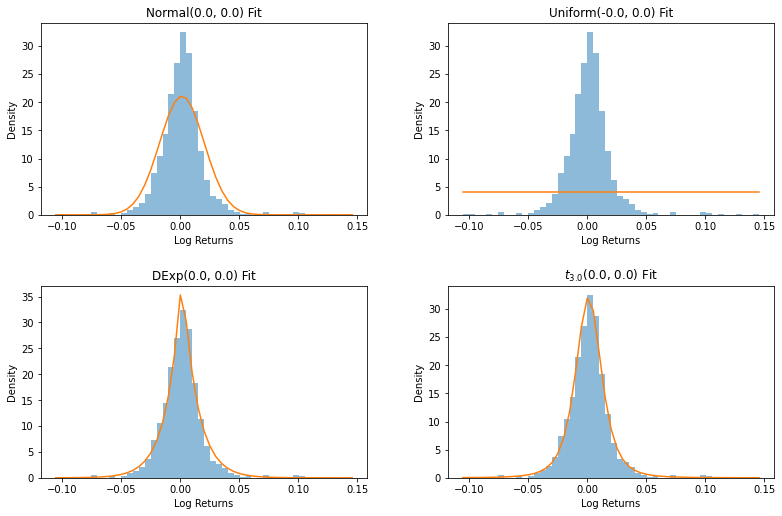

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout(pad=5)

# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0, 0].hist(llyLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(llyLogRet)
axs[0, 0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0, 0].set_title("Normal("+str(np.round(mu))+', '+str(np.round(sigma))+") Fit")

#---------------------------w/ Uniform PDF-----------------------------
axs[0, 1].hist(llyLogRet, bins=50, density=1, alpha=0.5)
a, b = stats.uniform.fit(llyLogRet)
axs[0, 1].plot(bins, uniform.pdf(bins, a, b), label='uniform pdf')
axs[0, 1].set_title("Uniform("+str(np.round(a))+', '+str(np.round(b))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1, 0].hist(llyLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(llyLogRet)
axs[1, 0].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1, 0].set_title("DExp("+str(np.round(loc_dexp))+', '+str(np.round(scale_dexp))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[1, 1].hist(llyLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(llyLogRet)
axs[1, 1].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[1, 1].set_title("$t_{"+str(np.round(df_t))+"}$"+"("+str(np.round(loc_t))+', '+str(np.round(scale_t))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')


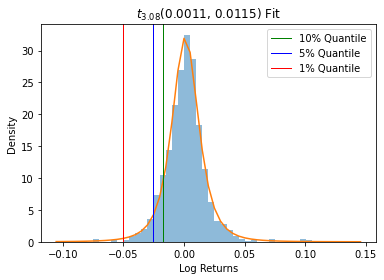

In [118]:
from scipy.stats import t
import statsmodels.api as sm

# plotting histogram
plt.hist(llyLogRet, bins=50, density=1, alpha=0.5)
df, loc, scale = stats.t.fit(llyLogRet)
plt.plot(bins, t.pdf(bins, df, loc, scale))
plt.title("$t_{"+str(np.round(df,2))+"}$"+"("+str(np.round(loc,4))+', '+str(np.round(scale,4))+") Fit")
plt.xlabel("Log Returns"); plt.ylabel("Density")

# calculating 10%, 5%, 1% quantiles
quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)

# calculating 10%, 5%, 1% VaR
rVaR_10 = -(np.exp(quantile_10)-1)
rVaR_5 = -(np.exp(quantile_5)-1)
rVaR_1 = -(np.exp(quantile_1)-1)

# plotting the cutoff of VaR
plt.axvline(quantile_10, color='green', linewidth=1, label='10% Quantile')
plt.axvline(quantile_5, color='blue', linewidth=1, label='5% Quantile')
plt.axvline(quantile_1, color='red', linewidth=1, label='1% Quantile')
plt.legend()

Text(0, 0.5, 'Density')

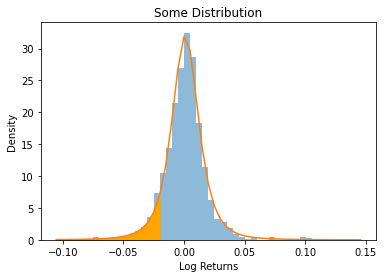

In [120]:
#  shading probability region of the 90% VaR
plt.hist(llyLogRet, bins=50, density=1, alpha=0.5)
df, loc, scale = stats.t.fit(llyLogRet)
plt.plot(bins, t.pdf(bins, df_t, loc_t, scale_t))
plt.fill_between(bins,t.pdf(bins, df_t, loc_t, scale_t), where = bins <=quantile_10, color='orange')
plt.title("Some Distribution") # this is a t-distribution, but I call it "some distribution" for generalization
plt.xlabel("Log Returns"); plt.ylabel("Density")

In [123]:
import random
random.seed(10)

# simulating losses/ log returns
simLoss = -(np.exp(t.rvs(df=df_t, loc=loc_t, scale=scale_t, size=10000000))-1)
# An example of a monte carlo simulation that simulates the amount 

-9.090625230157992


In [124]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])
rES_5 = np.mean(simLoss[simLoss>rVaR_5])
rES_1 = np.mean(simLoss[simLoss>rVaR_1])
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

,Significance Level,Quantile,rVaR,rES
0,10%,-0.017511,0.017358,0.030998
1,5%,-0.025567,0.025243,0.041213
2,1%,-0.049871,0.048648,0.073074


This data is able to say the following:

Relative Value-at-Risk(rVaR)

There is a 10% probability that my portfolio will incur a 1.73% loss in the next trading day if LLY is in it.

There is a 5% probability that my portfolio will incur a 2.52% loss in the next trading day if LLY is in it.

There is a 1% probability that my portfolio will incur a 4.86% loss in the next trading day if LLY is in it.



Relative Expected Shortfall(rES)

On average, LLY's stock will have a 3.10% loss in the next trading day given that the rVaR is 1.73% at a 10% Significance Level.

On average, LLY's stock will have a 4.12% loss in the next trading day given that the rVaR is 2.52% at a 5% Significance Level.

On average, LLY's stock will have a 7.31% loss in the next trading day given that the rVaR is 4.86% at a 1% Significance Level.

Compared to other stocks, this set of data does not incur a massive shortfall. Due to probability of a stock facing a loss, it is important to hold another stock to hedge the market.In the following section, I will be covering the hedging algorithm that I implemented. 


## Creating Hedging Pairs using K means Clustering
### We are implementing K-means Clustering because it performs convergences evenn on large datasets
### It locates the other samples that are relatively near in statistical terms and groups them together

In [126]:
stocks = pd.read_csv('stocks.csv')
sp500Stocks = list(stocks["Symbol"])
historical = {}

for ticker in sp500Stocks:
    try:
        historical[ticker] = si.get_data(ticker, start_date="01/01/2021", index_as_date = False, interval="1d")
    except:
        print("Ticker ", ticker , " is delisted")


Ticker  BRK.B  is delisted
Ticker  BF.B  is delisted


In [127]:
data = pd.concat(historical)
data = data.pivot(index='date', columns='ticker', values = 'adjclose')
data = data.dropna()

In [128]:
returns = data.pct_change().mean()*251
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(251)

scale = StandardScaler().fit(returns)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(returns),columns = returns.columns, index = returns.index)
X = scaled_data
X.head()


,returns,volatility
ticker,,
A,0.312735,-0.728256
AAL,0.190922,2.216194
AAP,-0.387733,-0.163774
AAPL,0.200536,-0.119775
ABBV,0.962454,-0.925389


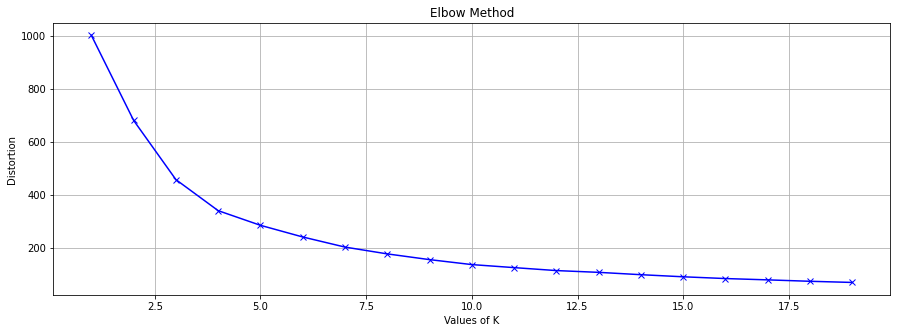

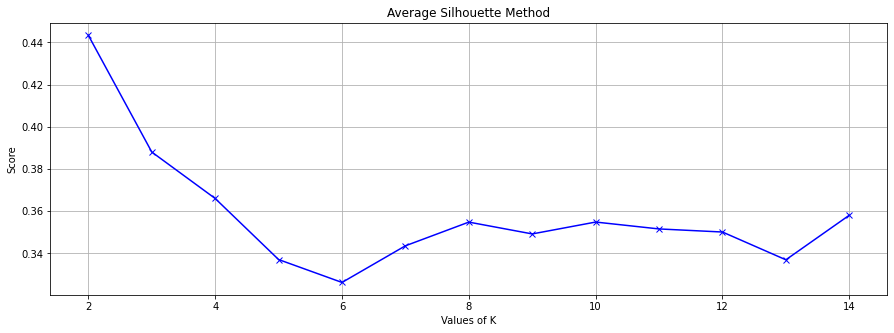

In [129]:
#To analyze the ideal number of clusters for K-means Clusters, I am implementing the elbow method and the average silhouette method to see the optimal amount of clusters. 
K = range(1,20)
distortions = []

for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()
#Values above 200 distortion are the ideal number of clusters
#Elbow = 6


#For the averagesilhouette method k needs to start from 2
K = range(2,15)
silhouettes = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('Average Silhouette Method')
plt.grid(True)
plt.show()
#This method is optimizing 5 clusters.  
# We will test 5 and 6 in our clustering

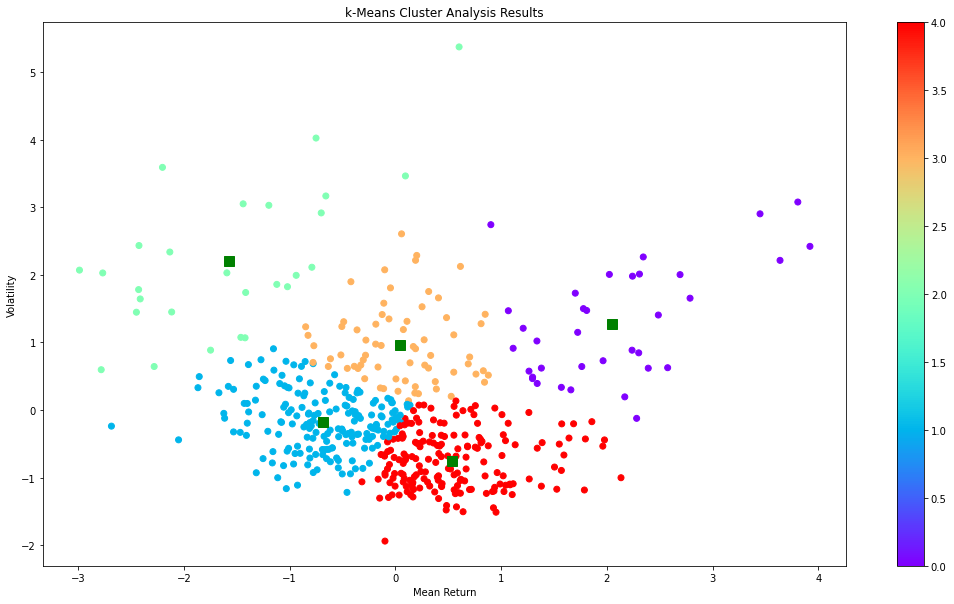

In [130]:
c = 5
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

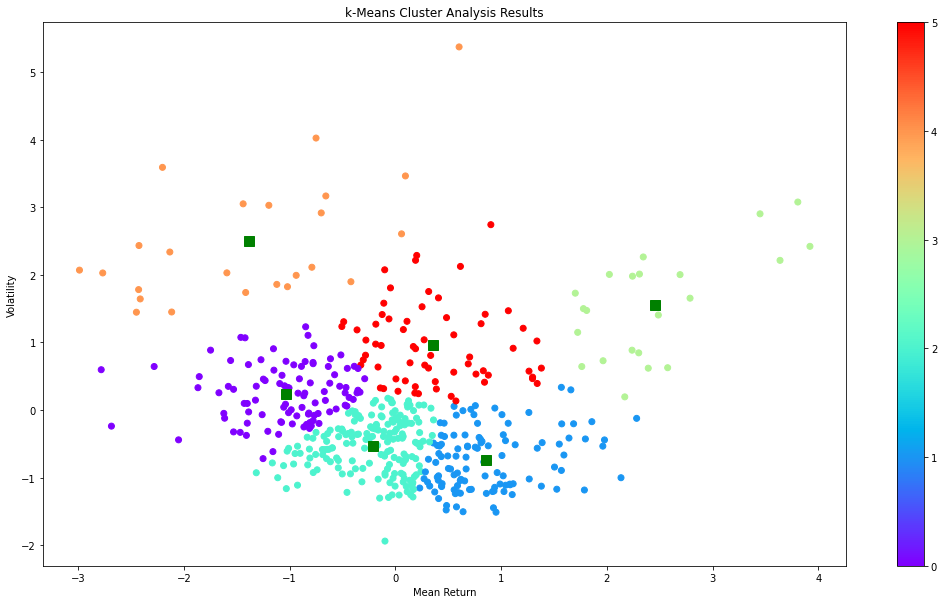

In [131]:
c = 6
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

### The bottom right cluster in both cluster graphs returns high returns in stocks while having minimal volatility which is ideal.
### We will use 6 clusters as it proves to be more specific to the dataset.

In [132]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]

cluster_dict = {}

def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data[tickers])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print(pairs)

[('AAP', 'ABT'), ('AAP', 'ACN'), ('AAP', 'AIG'), ('AAP', 'AKAM'), ('AAP', 'ALLE'), ('AAP', 'AVGO'), ('AAP', 'BAX'), ('AAP', 'CPT'), ('AAP', 'CTSH'), ('AAP', 'EMR'), ('AAP', 'ESS'), ('AAP', 'FRT'), ('AAP', 'HPE'), ('AAP', 'IPG'), ('AAP', 'JNPR'), ('AAP', 'KIM'), ('AAP', 'LUV'), ('AAP', 'MKC'), ('AAP', 'NLOK'), ('AAP', 'PG'), ('AAP', 'PRU'), ('AAP', 'REG'), ('AAP', 'ROP'), ('AAP', 'TRMB'), ('AAP', 'USB'), ('A', 'BMY'), ('A', 'DRI'), ('ADBE', 'BIO'), ('ADBE', 'CHTR'), ('ADBE', 'LRCX'), ('ADBE', 'NTRS'), ('ADBE', 'PEAK'), ('ADBE', 'TER'), ('ADBE', 'VFC'), ('AAL', 'FCX'), ('AAL', 'MAR'), ('AAL', 'TGT'), ('ALGN', 'CZR'), ('ALGN', 'ILMN'), ('ALGN', 'NOW'), ('ALGN', 'SBNY'), ('ALB', 'CEG')]
